In [1]:
import bilby as bb
import gwpopulation as gwpop
import matplotlib.pyplot as plt
import pandas as pd
from bilby.core.prior import PriorDict, Uniform
import os
import bilby
import numpy as np

In [2]:
#gwpop.set_backend("jax")

#xp = gwpop.utils.xp

project_dir = '/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/'
#project_dir = '/home/divyajyoti.nln/Cardiff_University/Next_gen_detectability/A-sharp-study/'

In [3]:
netw = 'Asharp'
#netw = 'CE4020ET123'
#mass_band = 'below_40'
#mass_band = '40-80'
#mass_band = 'above_80'
#outdir = os.path.join(project_dir, 'gwpopulation', 'BBH', 'gwpop_analysis_results', 
#                      netw, 'mass_bands', mass_band, 'run03_gwfish_mf_from_opt_SNR_injections_XPHM')
outdir = os.path.join(project_dir, 'gwpopulation', 'BBH', 'gwpop_analysis_results', 
                      netw, 'run08_gwfish_mf_from_opt_SNR_injections_XPHM')

In [4]:
result = bilby.result.read_in_result(filename=os.path.join(outdir, f'{netw}_result.hdf5'))
#result = bilby.result.read_in_result(filename=os.path.join(outdir, 'CE4020ET123_result.hdf5'))

## Add the new parameter which is peak of the curve

In [5]:
def z_peak_new(gamma, kappa, z_peak):
    new_peak = (gamma/(kappa-gamma))**(1/kappa) * (1+z_peak) - 1
    return(new_peak)

In [6]:
if "MDhigh" in outdir:
    true_params = {'gamma':1.7982, 'kappa':5.3226, 'z_peak':2.4199}
elif 'MDlow' in outdir:
    true_params = {'gamma':1.8111, 'kappa':5.2753, 'z_peak':1.4917}
else:
    true_params = {'gamma':1.8032, 'kappa':5.3023, 'z_peak':1.8362}
true_params['z_peak_new'] = z_peak_new(**true_params)

In [7]:
true_params

{'gamma': 1.8032,
 'kappa': 5.3023,
 'z_peak': 1.8362,
 'z_peak_new': 1.5028643466529545}

In [8]:
result.posterior

,gamma,kappa,log_likelihood,log_prior,z_peak
0,0.926377,10.460331,39826.565062,-5.857933,2.429039
1,0.938890,7.700971,39826.818837,-5.857933,2.282913
2,1.170644,9.842855,39826.957346,-5.857933,2.318738
3,1.614138,7.259042,39827.322497,-5.857933,2.049357
4,0.889901,10.210271,39827.787872,-5.857933,2.481523
...,...,...,...,...,...
3201,1.330378,6.255265,39835.396910,-5.857933,2.102443
3202,1.324339,6.376691,39835.399098,-5.857933,2.115502
3203,1.334903,6.292667,39835.399183,-5.857933,2.098517
3204,1.328257,6.311996,39835.399702,-5.857933,2.112788


In [9]:
result.priors

{'gamma': Uniform(minimum=0, maximum=5, name=None, latex_label='$\\gamma$', unit=None, boundary=None),
 'kappa': Uniform(minimum=0, maximum=20, name=None, latex_label='$\\kappa$', unit=None, boundary=None),
 'z_peak': Uniform(minimum=0.5, maximum=4, name=None, latex_label='$z_{peak}$', unit=None, boundary=None)}

In [10]:
z_peak_new_posterior = z_peak_new(result.posterior['gamma'], 
                                  result.posterior['kappa'], 
                                  result.posterior['z_peak'])

In [11]:
result.posterior.loc[:, 'z_peak_new'] = z_peak_new_posterior

In [12]:
result.posterior.sort_values('z_peak_new')

,gamma,kappa,log_likelihood,log_prior,z_peak,z_peak_new
13,1.522310,5.085655,39828.675409,-5.857933,1.744956,1.322249
11,1.878743,4.458802,39828.565737,-5.857933,1.495297,1.323943
45,2.057221,4.982087,39830.130887,-5.857933,1.494110,1.324025
50,1.660178,4.889422,39830.255285,-5.857933,1.666686,1.327426
40,1.764996,5.590916,39829.934149,-5.857933,1.678573,1.332423
...,...,...,...,...,...,...
71,1.005320,8.685893,39830.593223,-5.857933,2.492448,1.763507
69,0.986017,8.768208,39830.541109,-5.857933,2.500158,1.765422
39,1.002234,8.061577,39829.827861,-5.857933,2.523793,1.765957
4,0.889901,10.210271,39827.787872,-5.857933,2.481523,1.766056


### Remove outlier points if need be

In [25]:
result.posterior = result.posterior.sort_values('z_peak_new').dropna()
result.posterior

,gamma,kappa,log_likelihood,log_prior,z_peak,z_peak_new
2,1.985098,4.480870,39825.124308,-5.857933,1.388033,1.269092
15,1.912057,4.797847,39827.115232,-5.857933,1.491485,1.286647
21,1.973283,5.104658,39827.490798,-5.857933,1.513771,1.296355
11,1.679244,4.636828,39826.920304,-5.857933,1.606665,1.307118
7,2.158264,5.303787,39826.289892,-5.857933,1.484085,1.313784
...,...,...,...,...,...,...
73,1.031221,8.745275,39828.943795,-5.857933,2.466221,1.753750
5,0.785566,8.620906,39826.096965,-5.857933,2.597766,1.755284
56,0.911582,8.794990,39828.640975,-5.857933,2.522386,1.756185
28,1.092469,7.939820,39827.680146,-5.857933,2.474921,1.757722


In [14]:
ci99 = (result.posterior['z_peak_new'] > np.quantile(result.posterior['z_peak_new'], 0.99))
negative_vals = (result.posterior['z_peak_new'] < 0)
#drop_index = result.posterior[ci99 | negative_vals].index
drop_index = result.posterior[negative_vals].index

In [15]:
drop_index

Index([140,  68,  71,  84, 184, 421,   6, 170, 100, 128,  40, 417, 114, 141,
       182, 132, 301,   3, 359,  77, 134],
      dtype='int64')

In [16]:
result.posterior = result.posterior.drop(index=drop_index)
result.posterior

,gamma,kappa,log_likelihood,log_prior,z_peak,z_peak_new
325,0.032124,3.166125,347.768010,-5.857933,3.477664,0.053790
924,0.021812,4.147276,348.789539,-5.857933,2.769021,0.064753
108,0.345900,2.126269,346.908391,-5.857933,1.314030,0.070822
1215,0.014327,4.419923,349.027382,-5.857933,3.131998,0.130553
429,0.120672,2.848198,348.063445,-5.857933,2.395053,0.136060
...,...,...,...,...,...,...
79,0.310895,17.243456,346.559013,-5.857933,3.939700,2.917585
44,0.792745,11.796425,346.164868,-5.857933,3.900866,2.921295
103,0.515387,13.720777,346.884636,-5.857933,3.979622,2.931274
14,0.834912,15.941676,344.912980,-5.857933,3.750887,2.961790


### Plot corner

In [13]:
true_params

{'gamma': 1.8032,
 'kappa': 5.3023,
 'z_peak': 1.8362,
 'z_peak_new': 1.5028643466529545}

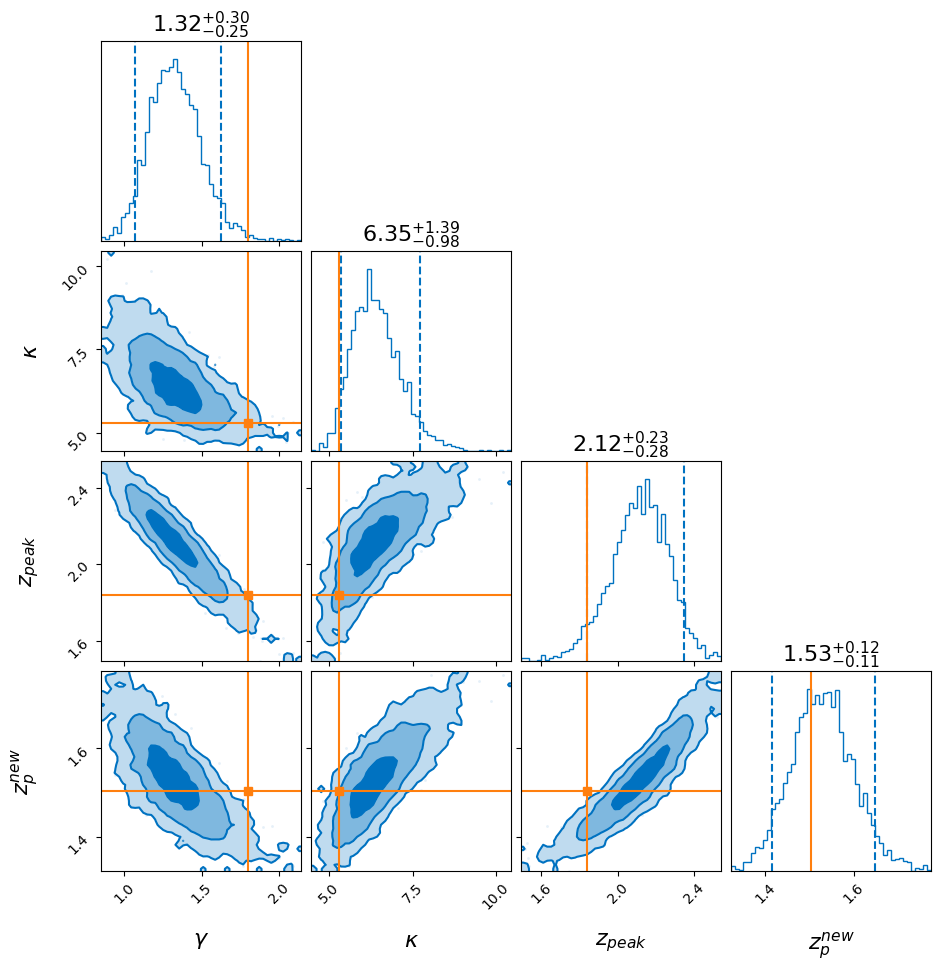

In [14]:
#result.plot_corner(parameters=list(true_params.keys()), outdir=outdir)
filename = f'{netw}_corner_with_truths.png'
#filename = 'CE4020ET123_corner_with_truths.png'
result.plot_corner(parameters=true_params, outdir=outdir, 
                   quantiles=(0.05, 0.95), 
                   filename=os.path.join(outdir, filename), labels=['$\\gamma$', '$\\kappa$', '$z_{peak}$', '$z_{p}^{new}$'])

## Check variance

In [74]:
#gwpop.set_backend("jax")

#xp = gwpop.utils.xp

project_dir = '/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/'
#project_dir = '/home/divyajyoti.nln/Cardiff_University/Next_gen_detectability/A-sharp-study/'

In [75]:
netw = 'Asharp'
#netw = 'CE4020ET123'
#mass_band = 'below_40'
#mass_band = '40-80'
#mass_band = 'above_80'
#outdir = os.path.join(project_dir, 'gwpopulation', 'BBH', 'gwpop_analysis_results', 
#                      netw, 'mass_bands', mass_band, 'run03_gwfish_mf_from_opt_SNR_injections_XPHM')
rundir = os.path.join(project_dir, 'gwpopulation', 'BBH', 'gwpop_analysis_results', 
                      netw, 'run05_gwfish_mf_from_opt_SNR_injections_XPHM')

In [76]:
var_data = pd.read_csv(os.path.join(rundir, 'full_posterior_low_var_events.csv'))

In [77]:
var_data

,Unnamed: 0,key,sample_0
0,0,var_0,1.369832e-05
1,1,var_1,6.418322e-06
2,2,var_10,9.650263e-06
3,3,var_100,3.412744e-06
4,4,var_1000,3.183374e-06
...,...,...,...
4052,4052,var_995,1.788858e-06
4053,4053,var_996,7.791295e-06
4054,4054,var_997,4.116156e-06
4055,4055,var_998,2.848729e-07


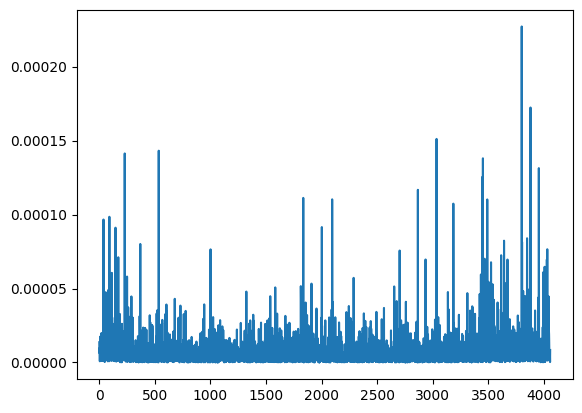

In [86]:
plt.plot(var_data['sample_0']);

In [82]:
np.sum(var_data['sample_0'])

0.02927127576058349

## Calculate variance

In [19]:
gwpop.set_backend("jax")
from gwpopulation.experimental.jax import JittedLikelihood, NonCachingModel
import jax

xp = gwpop.utils.xp

project_dir = '/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/'
#project_dir = '/home/divyajyoti.nln/Cardiff_University/Next_gen_detectability/A-sharp-study/'

/home/divyajyoti/miniconda3/envs/gwpopulation/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/divyajyoti/miniconda3/envs/gwpopulation/lib/python3.11/site-packages/htcondor/__init__.py:49: UserWarning: Neither the environment variable CONDOR_CONFIG, /etc/condor/, /usr/local/etc/, nor ~condor/ contain a condor_config source. Therefore, we are using a null condor_config.
  _warnings.warn(message)


In [22]:
#netw = 'Asharp'
netw = 'CE4020ET123'
#mass_band = 'below_40'
#mass_band = '40-80'
mass_band = 'above_80'
outdir = os.path.join(project_dir, 'gwpopulation', 'BBH', 'gwpop_analysis_results', 
                      netw, 'mass_bands', mass_band, 'run01_original_cov_mf_from_opt_SNR_injections_XPHM')
#outdir = os.path.join(project_dir, 'gwpopulation', 'BBH', 'gwpop_analysis_results', 
#                      netw, 'run09_original_cov_mf_from_opt_SNR_injections_XPHM')

In [23]:
result = bilby.result.read_in_result(filename=os.path.join(outdir, f'{netw}_result.hdf5'))
#result = bilby.result.read_in_result(filename=os.path.join(outdir, 'CE4020ET123_result.hdf5'))

In [24]:
with open(os.path.join(outdir, 'README.txt'), 'r') as f:
    lines = [line.rstrip('\n').strip('\t') for line in f]
readme_dict = {}
for line in lines:
    words = line.split()
    if 'Posterior' in words:
        readme_dict['posterior_file'] = words[-1].replace('divyajyoti.nln/', 'divyajyoti/ACADEMIC/Projects/')
    elif 'Injections' in words:
        readme_dict['injections_file'] = words[-1].replace('divyajyoti.nln/', 'divyajyoti/ACADEMIC/Projects/')

In [25]:
readme_dict

{'posterior_file': '/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/gwpopulation/BBH/mass_bands/CE4020ET123_CoBA10_2_PLP_z_MD_zmax_10_lmrd_22_no_spins_set3_z_posteriors_original_cov_49_events_pop_from_XPHM_above_80.pkl',
 'injections_file': '/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/gwpopulation/BBH/injections/mass_bands/XPHM/CE4020ET123_CoBA10_SNR_2_pop_PLP_spin_prec_z_MD_zmax_10_lmrd_22_corrected_td_detected_injs_mf_from_opt_SNR_19852_points_above_80.pkl'}

In [26]:
# ## Load posteriors
posteriors = pd.read_pickle(readme_dict['posterior_file'])

In [127]:
# ## Load injections

import dill
from tqdm import tqdm

with open(readme_dict['injections_file'], "rb") as ff:
    injections = dill.load(ff)

In [128]:
z_max = 10
model = NonCachingModel(
    model_functions=[gwpop.models.redshift.MadauDickinsonRedshift(cosmo_model="Planck18", z_max=z_max)],
    #model_functions=[gwpop.models.redshift.PowerLawRedshift(z_max=8)],
)

vt = gwpop.vt.ResamplingVT(model=model, data=injections, n_events=len(posteriors))

likelihood = gwpop.hyperpe.HyperparameterLikelihood(
    posteriors=posteriors,
    hyper_prior=model,
    selection_function=vt,
)

priors = PriorDict()
priors['gamma'] = Uniform(minimum=0, maximum=5, latex_label="$\\gamma$")
priors['kappa'] = Uniform(minimum=0, maximum=20, latex_label="$\\kappa$")
priors['z_peak'] = Uniform(minimum=0.5, maximum=4, latex_label="$z_{peak}$")

parameters = priors.sample()
likelihood.parameters.update(parameters)

In [131]:
likelihood.ln_likelihood_and_variance?

Signature: likelihood.ln_likelihood_and_variance()
Docstring: Compute the ln likelihood estimator and its variance.
File:      ~/miniconda3/envs/gwpopulation/lib/python3.11/site-packages/gwpopulation/hyperpe.py
Type:      method

In [30]:
func = jax.jit(likelihood.generate_extra_statistics)
#func = jax.jit(likelihood.ln_likelihood_and_variance)

In [43]:
test_full_posterior_list = [func(parameters) for parameters in tqdm(result.posterior.to_dict(orient="records"), desc='constructing full posterior')]
test_full_posterior = pd.DataFrame(test_full_posterior_list).astype(float)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2726/2726 [00:15<00:00, 171.65it/s]


In [58]:
len(test_full_posterior_list)

2726

In [118]:
import numpy as np

keys_ln_bf = []
keys_var_event = []
keys_main = []
for key in test_full_posterior_list[0].keys():
    if 'ln_bf' in key:
        keys_ln_bf.append(key)
    elif 'var_' in key:
        keys_var_event.append(key)
    else:
        keys_main.append(key)
keys_ln_bf.extend(keys_main)
keys_var_event.extend(keys_main)
"""
# Convert keys to list of indices (functions) to avoid repeated lookups
extractors_ln_bf     = [lambda d, k=k: d[k] for k in keys_ln_bf]
extractors_var_event = [lambda d, k=k: d[k] for k in keys_var_event]
extractors_main      = [lambda d, k=k: d[k] for k in keys_main]

# Preallocate arrays
N = len(test_full_posterior_list)
data_ln_bf     = np.empty((N, len(keys_ln_bf)), dtype=np.float32)
data_var_event = np.empty((N, len(keys_var_event)), dtype=np.float32)
data_main      = np.empty((N, len(keys_main)), dtype=np.float32)

# Fill arrays using extractors
for i, d in tqdm(enumerate(test_full_posterior_list), total=N, desc='Converting to arrays'):
    data_ln_bf[i]     = [f(d) for f in extractors_ln_bf]
    data_var_event[i] = [f(d) for f in extractors_var_event]
    data_main[i]      = [f(d) for f in extractors_main]

# Vectorized conversion to dict of arrays
dict_ln_bf     = dict(zip(keys_ln_bf,     data_ln_bf.T))
dict_var_event = dict(zip(keys_var_event, data_var_event.T))
dict_main      = dict(zip(keys_main,      data_main.T))

"""
data_ln_bf = np.empty((len(test_full_posterior_list), len(keys_ln_bf)), dtype=np.float32)
data_var_event = np.empty((len(test_full_posterior_list), len(keys_var_event)), dtype=np.float32)
data_main = np.empty((len(test_full_posterior_list), len(keys_main)), dtype=np.float32)

for i, d in tqdm(enumerate(test_full_posterior_list), total=len(test_full_posterior_list), desc='Converting to dictionaries'):
    data_ln_bf[i] = [d[k] for k in keys_ln_bf]
    data_var_event[i] = [d[k] for k in keys_var_event]
    data_main[i] = [d[k] for k in keys_main]

# Convert to dict of arrays
dict_ln_bf = {k: data_ln_bf[:, i] for i, k in enumerate(keys_ln_bf)}
dict_var_event = {k: data_var_event[:, i] for i, k in enumerate(keys_var_event)}
dict_main = {k: data_main[:, i] for i, k in enumerate(keys_main)}

Converting to dictionaries: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2726/2726 [00:01<00:00, 1526.93it/s]


In [108]:
df_main = pd.DataFrame(dict_main)

In [109]:
df_main.describe()

,gamma,kappa,log_likelihood,log_prior,selection,selection_variance,variance,z_peak
count,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2.726000e+03,2726.000000,2726.000000
mean,1.907401,5.996839,348.920807,-5.857933,0.999426,2.852150e-06,0.006922,2.068088
std,1.418292,1.680055,0.973480,0.000000,0.001255,2.823121e-06,0.006776,0.851838
min,0.000085,2.126269,340.495758,-5.857933,0.995153,3.261948e-08,0.000150,0.505977
25%,0.687937,4.923723,348.497223,-5.857933,0.998645,1.178110e-06,0.002897,1.354990
50%,1.576846,5.878192,349.140945,-5.857933,0.999521,2.046581e-06,0.004986,1.916559
75%,2.985056,6.878242,349.599495,-5.857933,1.000288,3.619512e-06,0.008758,2.738614
max,4.998580,17.243456,350.289764,-5.857933,1.003706,3.582271e-05,0.086029,3.999785


In [113]:
df_main[result.search_parameter_keys + ["log_likelihood", "variance"]].corr()

,gamma,kappa,z_peak,log_likelihood,variance
gamma,1.000000,0.198562,-0.804147,0.311881,-0.050510
kappa,0.198562,1.000000,0.250383,-0.164009,-0.004891
z_peak,-0.804147,0.250383,1.000000,-0.320078,0.032138
log_likelihood,0.311881,-0.164009,-0.320078,1.000000,-0.807387
variance,-0.050510,-0.004891,0.032138,-0.807387,1.000000


### Save to files

In [112]:
import h5py
with h5py.File(os.path.join(outdir, 'ln_bf_vals_events.h5'), 'w') as f:
    for key, array in dict_ln_bf.items():
        f.create_dataset(key, data=array)

with h5py.File(os.path.join(outdir, 'var_vals_events.h5'), 'w') as f:
    for key, array in dict_var_event.items():
        f.create_dataset(key, data=array)

In [114]:
df_main.to_csv(os.path.join(outdir, 'full_posterior_main.csv'))

### Plot the scatter matrix

In [115]:
pd.plotting.scatter_matrix(
    df_main[["gamma", "kappa", "z_peak", "log_likelihood", "variance"]],
    alpha=0.5,
)
plt.tight_layout()
plt.savefig(os.path.join(outdir, 'param_variance_matrix.png'), dpi=300)